<a href="https://colab.research.google.com/github/Karthikard/ML/blob/main/3_house_price_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving houseprice_multivariate.xlsx to houseprice_multivariate.xlsx


In [4]:
df = pd.read_excel('houseprice_multivariate.xlsx')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Data Preprocessing

In [6]:
median_bedrooms= df.bedrooms.median()

In [9]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
print(median_bedrooms)

3


In [11]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [12]:
reg=linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [13]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [18]:
reg.intercept_

np.float64(383724.9999999998)

In [16]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [17]:
137.25*3000+ -26025*3 + -6825*40 + 383724.9999999998

444399.9999999998

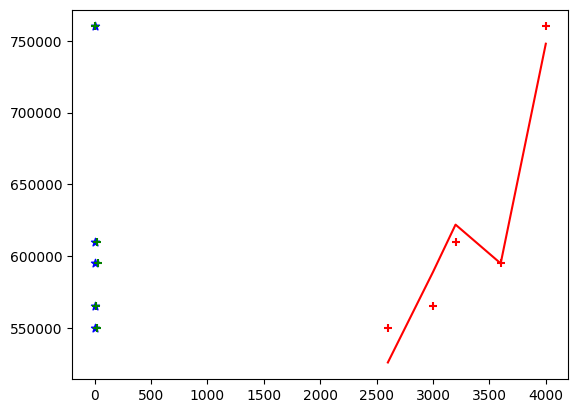

In [28]:
plt.scatter(df.area,df.price,color='red',marker="+")
plt.scatter(df.bedrooms,df.price,color='blue',marker="*")
plt.scatter(df.age,df.price,color='green',marker="+")

plt.plot(df.area,reg.predict(df[['area','bedrooms','age']]),color='red')